In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
data = pd.read_csv('Rat_Sightings.csv')

In [3]:
data = data.sample(frac=0.1, random_state=200)
data = data.iloc[:, 23:26]
data.shape

(10191, 3)

In [4]:
# for i in range(0,len(data)):
#     print(data.iloc[i,0])

In [5]:
#data [data['Borough'] == 'BROOKLYN']
real_labels = [];

for i in range(0,len(data)):
    #print(data.iloc[i,0])
    if(data.iloc[i,0] == 'BROOKLYN'):
        real_labels.append(0);
    elif(data.iloc[i,0] == 'MANHATTAN') :
        real_labels.append(1);
    elif(data.iloc[i,0] == 'BRONX') :
        real_labels.append(2);
    elif(data.iloc[i,0] == 'STATEN ISLAND') :
        real_labels.append(3);
    elif(data.iloc[i,0] == 'QUEENS') :
        real_labels.append(4);

len(real_labels)

10191

In [6]:
#pega os dados do data set
list1=list(data['X Coordinate (State Plane)'])
list2=list(data['Y Coordinate (State Plane)'])

#transforma os dados em uma lista conjunta
X = zip(list1,list2)
dt=np.dtype('int')
listaSemNaN=[]
X=list(X)

#remove dessa lista valores que causam erros por não serem numeros
for i in range(0,len(X)):
    tup=X[i]
    if((X[i][0] == X[i][0]) is False or (X[i][1] == X[i][1]) is False):
        nada = 0 #print "Não é NaN"
    else:
        listaSemNaN.append(tup)
        
#Transforma em um NP.Array para realizar contas matematicas da blibioteca numpy
X = np.array(listaSemNaN,dtype=dt)

In [7]:
scores = []
labels = []
range_values = np.arange(2, 4)


Number of clusters = 2
Silhouette score = 0.5023462659840675
Labels = [1 1 0 ... 1 1 1]

Number of clusters = 3
Silhouette score = 0.4963131958142703
Labels = [0 0 1 ... 0 0 0]


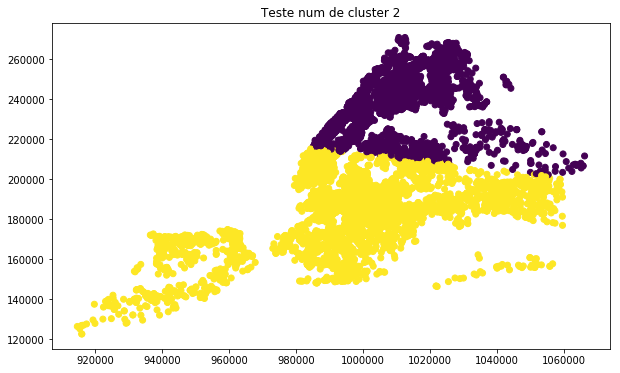

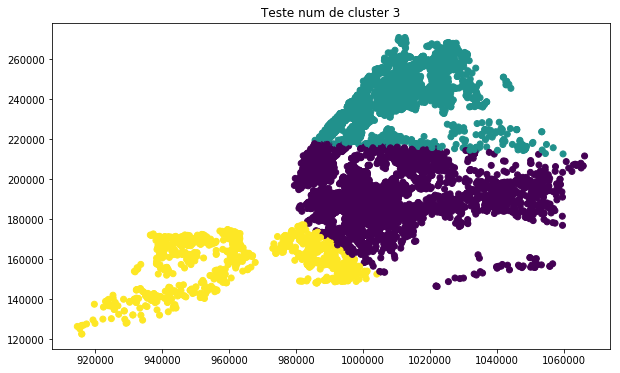

In [8]:
for i in range_values:
    kmeans = KMeans(init= 'k-means++', n_clusters=i, n_init=10)
    teste = kmeans.fit_predict(X)
    score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=len(data))
    label = kmeans.labels_
    
    plt.figure(figsize=(10,6))
    plt.scatter(X[:, 0], X[:, 1], c=label)
    plt.title("Teste num de cluster "+str(i))
    
    print('\nNumber of clusters =', i)
    print('Silhouette score =', score)
    print('Labels =', label)
    
    scores.append(score)
    labels.append(label)

In [9]:

df = pd.DataFrame({"x":np.array(X[:, 0]).flatten(), 
                   "y":np.array(X[:, 1]).flatten(), 
                   "colors":np.array(labels[0]).flatten()})

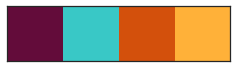

In [10]:
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

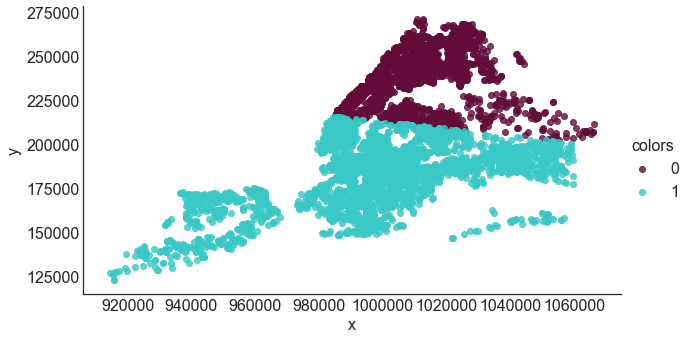

In [27]:
#plot data with seaborn
facet = sns.lmplot(data=df, x='x', y='y', hue='colors', size=5, aspect=1.8,
                   fit_reg=False, legend=True, legend_out=True)